<a href="https://colab.research.google.com/github/maviarena/AIML/blob/master/R7_InternalLab_Questions_FMNIST_Simple_CNN_CIFAR_DATA_Augment_(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Train a simple convnet on the Fashion MNIST dataset

In this, we will see how to deal with image data and train a convnet for image classification task.

### Load the  `fashion_mnist`  dataset

** Use keras.datasets to load the dataset **

In [0]:
from __future__ import absolute_import, division, print_function
import numpy as np
import keras
import os
from keras.datasets import cifar10, mnist
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Reshape
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
import pickle
from matplotlib import pyplot as plt
import seaborn as sns

In [1]:
from keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

Using TensorFlow backend.


4423680/4422102 [==============================] - 0s 0us/step


### Find no.of samples are there in training and test datasets

In [7]:
print("No of samples in training set : ",x_train.shape[0])
print("No of samples in test set : ",x_test.shape[0])

No of samples in training set :  60000
No of samples in test set :  10000


In [0]:
""

### Find dimensions of an image in the dataset

In [10]:
print("Dimnsion of image: ",x_train.shape[1], x_train.shape[2])

Dimnsion of image:  28 28


### Convert train and test labels to one hot vectors

** check `keras.utils.to_categorical()` **

In [0]:
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)


In [0]:
num_classes = y_test.shape[1]

### Normalize both the train and test image data from 0-255 to 0-1

In [0]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train = x_train / 255.0
x_test = x_test / 255.0

### Reshape the data from 28x28 to 28x28x1 to match input dimensions in Conv2D layer in keras

In [0]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1).astype('float32')
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1).astype('float32')

### Import the necessary layers from keras to build the model

### Build a model 

** with 2 Conv layers having `32 3*3 filters` in both convolutions with `relu activations` and `flatten` before passing the feature map into 2 fully connected layers (or Dense Layers) having 128 and 10 neurons with `relu` and `softmax` activations respectively. Now, using `categorical_crossentropy` loss with `adam` optimizer train the model with early stopping `patience=5` and no.of `epochs=10`. **

In [31]:
model2 = Sequential()

    # 1st Conv Layer
model2.add(Convolution2D(32, 3, 3, input_shape=(28, 28, 1)))
model2.add(Activation('relu'))

    # 2nd Conv Layer
model2.add(Convolution2D(32, 3, 3))
model2.add(Activation('relu'))

    # Fully Connected Layer
model2.add(Flatten())
model2.add(Dense(128))
model2.add(Activation('relu'))

    # Prediction Layer
model2.add(Dense(10))
model2.add(Activation('softmax'))
    
    # Loss and Optimizer
model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    # Store Training Result
early_stopping = keras.callbacks.EarlyStopping(monitor='val_acc', patience=5, verbose=1, mode='auto')
callback_list = [early_stopping]

#Train the model2
model2.fit(x_train, y_train, batch_size=32, nb_epoch=10, validation_data=(x_test, y_test), callbacks=callback_list)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(28, 28, 1...)`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3))`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
W0728 09:57:49.640463 140156162258816 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 19s 318us/step - loss: 0.3762 - acc: 0.8630 - val_loss: 0.2926 - val_acc: 0.8928
Epoch 2/10
60000/60000 [==============================] - 11s 180us/step - loss: 0.2335 - acc: 0.9143 - val_loss: 0.2532 - val_acc: 0.9053
Epoch 3/10
60000/60000 [==============================] - 11s 179us/step - loss: 0.1716 - acc: 0.9365 - val_loss: 0.2480 - val_acc: 0.9088
Epoch 4/10
60000/60000 [==============================] - 11s 180us/step - loss: 0.1230 - acc: 0.9543 - val_loss: 0.2672 - val_acc: 0.9098
Epoch 5/10
60000/60000 [==============================] - 11s 180us/step - loss: 0.0815 - acc: 0.9698 - val_loss: 0.2792 - val_acc: 0.9190
Epoch 6/10
60000/60000 [==============================] - 11s 179us/step - loss: 0.0557 - acc: 0.9798 - val_loss: 0.3055 - val_acc: 0.9148
Epoch 7/10
60000/60000 [==============================] - 11s 181us/step - loss: 0.0354 - acc: 0.9876 - val_loss: 0.

### Now, to the above model add `max` pooling layer of `filter size 2x2` and `dropout` layer with `p=0.25` after the 2 conv layers and run the model

In [32]:
model3 = Sequential()

    # 1st Conv Layer
model3.add(Convolution2D(32, 3, 3, input_shape=(28, 28, 1)))
model3.add(Activation('relu'))

    # 2nd Conv Layer
model3.add(Convolution2D(32, 3, 3))
model3.add(Activation('relu'))

   # Max Pooling
model3.add(MaxPooling2D(pool_size=(2,2)))
    
    # Dropout
model3.add(Dropout(0.25))

    # Fully Connected Layer
model3.add(Flatten())
model3.add(Dense(128))
model3.add(Activation('relu'))

    # Prediction Layer
model3.add(Dense(10))
model3.add(Activation('softmax'))
    
    # Loss and Optimizer
model3.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    # Store Training Result
early_stopping = keras.callbacks.EarlyStopping(monitor='val_acc', patience=5, verbose=1, mode='auto')
callback_list = [early_stopping]

#Train the model2
model3.fit(x_train, y_train, batch_size=32, nb_epoch=10, validation_data=(x_test, y_test), callbacks=callback_list)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(28, 28, 1...)`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3))`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:34: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 10s 159us/step - loss: 0.3962 - acc: 0.8573 - val_loss: 0.3157 - val_acc: 0.8854
Epoch 2/10
60000/60000 [==============================] - 9s 158us/step - loss: 0.2630 - acc: 0.9028 - val_loss: 0.2628 - val_acc: 0.9028
Epoch 3/10
60000/60000 [==============================] - 9s 150us/step - loss: 0.2146 - acc: 0.9192 - val_loss: 0.2346 - val_acc: 0.9143
Epoch 4/10
60000/60000 [==============================] - 9s 150us/step - loss: 0.1832 - acc: 0.9314 - val_loss: 0.2268 - val_acc: 0.9203
Epoch 5/10
60000/60000 [==============================] - 9s 148us/step - loss: 0.1535 - acc: 0.9424 - val_loss: 0.2296 - val_acc: 0.9227
Epoch 6/10
60000/60000 [==============================] - 9s 149us/step - loss: 0.1325 - acc: 0.9500 - val_loss: 0.2318 - val_acc: 0.9222
Epoch 7/10
60000/60000 [==============================] - 9s 148us/step - loss: 0.1122 - acc: 0.9572 - val_loss: 0.2271 -

### Now, to the above model, lets add Data Augmentation 

### Import the ImageDataGenrator from keras and fit the training images

In [0]:
from keras.preprocessing.image import ImageDataGenerator

# This will do preprocessing and realtime data augmentation:
datagen = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,  # apply ZCA whitening
    rotation_range=50,  # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=False,  # randomly flip images
    vertical_flip=False)  # randomly flip images

# Prepare the generator
datagen.fit(x_train)

#### Showing 5 versions of the first image in training dataset using image datagenerator.flow()

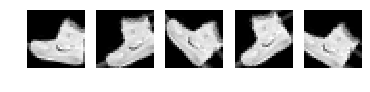

In [34]:
from matplotlib import pyplot as plt
gen = datagen.flow(x_train[0:1], batch_size=1)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(gen.next().squeeze(), cmap='gray')
    plt.plot()
plt.show()

### Run the above model using fit_generator()

In [37]:
model3.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model3.fit_generator(datagen.flow(x_train, y_train,
                        batch_size=32),
                        samples_per_epoch=x_train.shape[0],
                        nb_epoch=10,
                        validation_data=(x_test, y_test), callbacks=callback_list)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., callbacks=[<keras.ca..., steps_per_epoch=1875, epochs=10)`
  


Epoch 1/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.7876 - acc: 0.7135 - val_loss: 0.3719 - val_acc: 0.8683
Epoch 2/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.5499 - acc: 0.7971 - val_loss: 0.3242 - val_acc: 0.8917
Epoch 3/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.4919 - acc: 0.8177 - val_loss: 0.3274 - val_acc: 0.8892
Epoch 4/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.4568 - acc: 0.8317 - val_loss: 0.3396 - val_acc: 0.8839
Epoch 5/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.4327 - acc: 0.8395 - val_loss: 0.3200 - val_acc: 0.8886
Epoch 6/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.4199 - acc: 0.8443 - val_loss: 0.3591 - val_acc: 0.8756
Epoch 7/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.4031 - acc: 0.8508 - val_loss: 0.3352 - val_acc: 0.8799
Epoch 00007: early stopping


###  Report the final train and validation accuracy

In [38]:
loss_and_metrics = model3.evaluate(x_test, y_test)
print(loss_and_metrics)

10000/10000 [==============================] - 1s 61us/step
[0.3352377593636513, 0.8799]


## **DATA AUGMENTATION ON CIFAR10 DATASET**

One of the best ways to improve the performance of a Deep Learning model is to add more data to the training set. Aside from gathering more instances from the wild that are representative of the distinction task, we want to develop a set of methods that enhance the data we already have. There are many ways to augment existing datasets and produce more robust models. In the image domain, these are done to utilize the full power of the convolutional neural network, which is able to capture translational invariance. This translational invariance is what makes image recognition such a difficult task in the first place. You want the dataset to be representative of the many different positions, angles, lightings, and miscellaneous distortions that are of interest to the vision task.

### **Import neessary libraries for data augmentation**

In [0]:
from keras.preprocessing.image import ImageDataGenerator

### **Load CIFAR10 dataset**

In [0]:
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [0]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train = x_train / 255.0
x_test = x_test / 255.0

### **Create a data_gen funtion to genererator with image rotation,shifting image horizontally and vertically with random flip horizontally.**

In [59]:
# This will do preprocessing and realtime data augmentation:
datagen = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=True,  # apply ZCA whitening
    rotation_range=50,  # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=True,  # randomly flip images
    vertical_flip=True)  # randomly flip images



/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:336: UserWarning: This ImageDataGenerator specifies `zca_whitening`, which overrides setting of `featurewise_center`.
  warnings.warn('This ImageDataGenerator specifies '


### **Prepare/fit the generator.**

In [0]:
# Prepare the generator
datagen.fit(x_train)

### **Generate 5 images for 1 of the image of CIFAR10 train dataset.**

W0728 10:22:59.875523 140156162258816 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0728 10:22:59.891424 140156162258816 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0728 10:22:59.907494 140156162258816 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0728 10:22:59.927574 140156162258816 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0728 10:22:59.943847 140156162258816 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


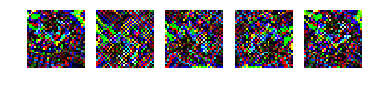

In [61]:
from matplotlib import pyplot as plt
gen = datagen.flow(x_train[0:1], batch_size=1)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(gen.next().squeeze(), cmap='gray')
    plt.plot()
plt.show()